<a href="https://colab.research.google.com/github/KJR020/Nishika_tutorial/blob/main/Nishika_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリのインポート

In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ファイルの読み込み

In [4]:
files = glob.glob("/content/drive/MyDrive/train/*.csv")

In [5]:
pd.read_csv(files[0])

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,2017618,中古マンション等,NaN,2202,青森県,弘前市,大字松森町,弘前,10,１Ｋ,50,NaN,NaN,NaN,昭和64年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業地域,80.0,400.0,2014年第１四半期,未改装,NaN,6.913814
1,2026039,中古マンション等,NaN,2202,青森県,弘前市,大字本町,弘前,23,３ＬＤＫ,55,NaN,NaN,NaN,平成4年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業地域,80.0,400.0,2008年第４四半期,改装済,NaN,6.913814
2,2017284,中古マンション等,NaN,2201,青森県,青森市,橋本,青森,30分?60分,３ＬＤＫ,75,NaN,NaN,NaN,昭和62年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,第２種住居地域,60.0,200.0,2008年第４四半期,未改装,NaN,7.000000
3,2010748,中古マンション等,NaN,2201,青森県,青森市,堤町,青森,25,１Ｋ,20,NaN,NaN,NaN,平成3年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業地域,80.0,400.0,2010年第４四半期,未改装,NaN,6.255273
4,2023661,中古マンション等,NaN,2203,青森県,八戸市,柏崎,本八戸,17,３ＬＤＫ,65,NaN,NaN,NaN,昭和57年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業地域,80.0,600.0,2010年第４四半期,未改装,NaN,6.724276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2032581,中古マンション等,NaN,2202,青森県,弘前市,大字鉄砲町,弘前,17,４ＤＫ,60,NaN,NaN,NaN,平成2年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業地域,80.0,400.0,2009年第１四半期,改装済,NaN,6.477121
695,2004679,中古マンション等,NaN,2202,青森県,弘前市,大字駅前町,弘前,1,３ＬＤＫ,70,NaN,NaN,NaN,平成16年,ＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2016年第４四半期,未改装,NaN,7.380211
696,2024361,中古マンション等,NaN,2202,青森県,弘前市,大字鉄砲町,弘前,18,１Ｒ,20,NaN,NaN,NaN,昭和60年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業地域,80.0,400.0,2008年第４四半期,未改装,NaN,6.079181
697,2019731,中古マンション等,NaN,2202,青森県,弘前市,大字亀甲町,中央弘前,19,２ＬＤＫ＋Ｓ,60,NaN,NaN,NaN,平成2年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2011年第４四半期,未改装,NaN,6.832509


In [6]:
files

['/content/drive/MyDrive/train/02.csv',
 '/content/drive/MyDrive/train/06.csv',
 '/content/drive/MyDrive/train/05.csv',
 '/content/drive/MyDrive/train/19.csv',
 '/content/drive/MyDrive/train/18.csv',
 '/content/drive/MyDrive/train/32.csv',
 '/content/drive/MyDrive/train/31.csv',
 '/content/drive/MyDrive/train/39.csv',
 '/content/drive/MyDrive/train/36.csv',
 '/content/drive/MyDrive/train/41.csv',
 '/content/drive/MyDrive/train/16.csv',
 '/content/drive/MyDrive/train/30.csv',
 '/content/drive/MyDrive/train/03.csv',
 '/content/drive/MyDrive/train/20.csv',
 '/content/drive/MyDrive/train/45.csv',
 '/content/drive/MyDrive/train/21.csv',
 '/content/drive/MyDrive/train/10.csv',
 '/content/drive/MyDrive/train/24.csv',
 '/content/drive/MyDrive/train/07.csv',
 '/content/drive/MyDrive/train/09.csv',
 '/content/drive/MyDrive/train/17.csv',
 '/content/drive/MyDrive/train/35.csv',
 '/content/drive/MyDrive/train/37.csv',
 '/content/drive/MyDrive/train/42.csv',
 '/content/drive/MyDrive/train/38.csv',


In [7]:
data_list = []
for file in files:
    data_list.append(pd.read_csv(file,index_col=0)) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data_list

[               種類  地域  市区町村コード 都道府県名  ...        取引時点   改装 取引の事情等 取引価格（総額）_log
 ID                                    ...                                     
 2017618  中古マンション等 NaN     2202   青森県  ...  2014年第１四半期  未改装    NaN     6.913814
 2026039  中古マンション等 NaN     2202   青森県  ...  2008年第４四半期  改装済    NaN     6.913814
 2017284  中古マンション等 NaN     2201   青森県  ...  2008年第４四半期  未改装    NaN     7.000000
 2010748  中古マンション等 NaN     2201   青森県  ...  2010年第４四半期  未改装    NaN     6.255273
 2023661  中古マンション等 NaN     2203   青森県  ...  2010年第４四半期  未改装    NaN     6.724276
 ...           ...  ..      ...   ...  ...         ...  ...    ...          ...
 2032581  中古マンション等 NaN     2202   青森県  ...  2009年第１四半期  改装済    NaN     6.477121
 2004679  中古マンション等 NaN     2202   青森県  ...  2016年第４四半期  未改装    NaN     7.380211
 2024361  中古マンション等 NaN     2202   青森県  ...  2008年第４四半期  未改装    NaN     6.079181
 2019731  中古マンション等 NaN     2202   青森県  ...  2011年第４四半期  未改装    NaN     6.832509
 2029043  中古マンション等 NaN     2203   青森県  .

In [9]:
df = pd.concat(data_list)

In [10]:
df.shape

(568575, 27)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568575 entries, 2017618 to 13045673
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            568575 non-null  object 
 1   地域            0 non-null       float64
 2   市区町村コード       568575 non-null  int64  
 3   都道府県名         568575 non-null  object 
 4   市区町村名         568575 non-null  object 
 5   地区名           568327 non-null  object 
 6   最寄駅：名称        566057 non-null  object 
 7   最寄駅：距離（分）     548581 non-null  object 
 8   間取り           549100 non-null  object 
 9   面積（㎡）         568574 non-null  object 
 10  土地の形状         0 non-null       float64
 11  間口            0 non-null       float64
 12  延床面積（㎡）       0 non-null       float64
 13  建築年           551949 non-null  object 
 14  建物の構造         555325 non-null  object 
 15  用途            526879 non-null  object 
 16  今後の利用目的       244592 non-null  object 
 17  前面道路：方位       0 non-null       float64
 

In [12]:
nonnull_list = []
for col in df.columns:
    nonnull = df[col].count()
    if nonnull == 0:
       nonnull_list.append(col)
nonnull_list
df = df.drop(nonnull_list,axis=1)

In [13]:
df.info() #Check the contents of the data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568575 entries, 2017618 to 13045673
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            568575 non-null  object 
 1   市区町村コード       568575 non-null  int64  
 2   都道府県名         568575 non-null  object 
 3   市区町村名         568575 non-null  object 
 4   地区名           568327 non-null  object 
 5   最寄駅：名称        566057 non-null  object 
 6   最寄駅：距離（分）     548581 non-null  object 
 7   間取り           549100 non-null  object 
 8   面積（㎡）         568574 non-null  object 
 9   建築年           551949 non-null  object 
 10  建物の構造         555325 non-null  object 
 11  用途            526879 non-null  object 
 12  今後の利用目的       244592 non-null  object 
 13  都市計画          551081 non-null  object 
 14  建ぺい率（％）       547403 non-null  float64
 15  容積率（％）        547403 non-null  float64
 16  取引時点          568574 non-null  object 
 17  改装            518243 non-null  object 
 

In [14]:
df["市区町村名"].value_counts() #Checking the number of "市区町村名"

大田区       7819
江東区       7301
世田谷区      6940
港区        6749
福岡市中央区    6507
          ... 
田川郡糸田町       1
粕屋郡新宮町       1
刈田郡蔵王町       1
新潟市西蒲区       1
安芸郡坂町        1
Name: 市区町村名, Length: 618, dtype: int64

In [15]:
 df = df.drop("市区町村名",axis=1) 

In [16]:
df.describe() #Checking statistics. Limited to int or float.

,市区町村コード,建ぺい率（％）,容積率（％）,取引価格（総額）_log
count,568575.000000,547403.000000,547403.000000,568574.000000
mean,19165.719636,67.441117,295.152913,7.196370
std,9964.985533,10.368833,146.020932,0.353505
min,1101.000000,30.000000,50.000000,2.653213
25%,13106.000000,60.000000,200.000000,6.991226
50%,14118.000000,60.000000,200.000000,7.255273
75%,27127.000000,80.000000,400.000000,7.431364
max,47213.000000,80.000000,1300.000000,9.934498


In [17]:
df.astype("str").describe()

,種類,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
count,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575,568575
unique,1,618,47,12045,3830,35,63,168,77,13,23,5,17,7,18,59,3,10,374
top,中古マンション等,13111,東京都,本町,nan,6,３ＬＤＫ,70,平成3年,ＲＣ,住宅,nan,商業地域,60.0,200.0,2014年第１四半期,未改装,nan,7.113943352306838
freq,568575,7819,121748,4493,2518,44308,253857,76081,20543,384713,520202,323983,150909,315385,275577,12230,373188,551657,19377


In [18]:
df = df.drop("種類",axis=1)

In [19]:
pd.set_option("display.max_rows", 500)
df["最寄駅：距離（分）"].value_counts()

6          44308
4          42303
5          39250
8          38880
3          36999
9          33688
30分?60分    31529
10         28017
7          27736
11         27408
2          22923
13         20947
14         17209
15         17148
1          16991
16         13338
12         13274
18         10944
19          9979
20          8517
21          6874
23          6423
25          5995
24          4710
28          4012
26          3881
1H?1H30     3593
29          3491
0           3080
17          2233
22          1006
2H?          819
1H30?2H      685
27           391
Name: 最寄駅：距離（分）, dtype: int64

In [20]:
df_temp = df["最寄駅：距離（分）"].replace("1H?1H30",75)

In [21]:
df_temp.value_counts() #1H?1H30の変換をする

6          44308
4          42303
5          39250
8          38880
3          36999
9          33688
30分?60分    31529
10         28017
7          27736
11         27408
2          22923
13         20947
14         17209
15         17148
1          16991
16         13338
12         13274
18         10944
19          9979
20          8517
21          6874
23          6423
25          5995
24          4710
28          4012
26          3881
75          3593
29          3491
0           3080
17          2233
22          1006
2H?          819
1H30?2H      685
27           391
Name: 最寄駅：距離（分）, dtype: int64

In [22]:
columns_list = df.columns
columns_list

Index(['市区町村コード', '都道府県名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '面積（㎡）', '建築年',
       '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時点', '改装',
       '取引の事情等', '取引価格（総額）_log'],
      dtype='object')

In [23]:
#'price', 'review.point'列に数値型に変換できない要素があれば 'False' を返す．
df[columns_list].apply(lambda s:pd.to_numeric(s, errors='coerce')).notnull().all()

市区町村コード          True
都道府県名           False
地区名             False
最寄駅：名称          False
最寄駅：距離（分）       False
間取り             False
面積（㎡）           False
建築年             False
建物の構造           False
用途              False
今後の利用目的         False
都市計画            False
建ぺい率（％）         False
容積率（％）          False
取引時点            False
改装              False
取引の事情等          False
取引価格（総額）_log    False
dtype: bool

In [24]:
# 数値ではない型の要素の抽出
pic = df[['最寄駅：距離（分）']][df['最寄駅：距離（分）'].apply(lambda s:pd.to_numeric(s, errors='coerce')).isnull()]

In [25]:
pic.apply(lambda s:s.unique())

,最寄駅：距離（分）
0,30分?60分
1,NaN
2,1H30?2H
3,1H?1H30
4,2H?


In [26]:
dis = {
    "30分?60分":45,
    "1H30?2H":105,
    "1H?1H30":75,
    "2H?":120
}

In [27]:
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].replace(dis).astype(float)

In [28]:
df['最寄駅：距離（分）']

ID
2017618     10.0
2026039     23.0
2017284     45.0
2010748     25.0
2023661     17.0
            ... 
13279662     5.0
13010516     7.0
13217307     8.0
13104097    13.0
13045673     NaN
Name: 最寄駅：距離（分）, Length: 568575, dtype: float64

In [29]:
df['面積（㎡）'].value_counts()

70         64856
65         59473
60         46394
75         44156
55         33550
80         30329
20         29622
50         23172
15         19937
85         18295
45         14686
25         13947
70         13142
65         13113
90         11665
60         11289
20         11258
75          9282
40          9140
95          8465
55          8035
30          7526
80          7090
35          6995
15          5740
25          5654
50          5448
85          4530
100         4108
45          3147
90          2889
40          2785
30          2548
105         2322
35          2174
95          1887
110         1441
115         1037
100          925
10           713
120          694
105          581
125          465
110          394
130          350
10           310
115          308
135          249
120          193
145          186
140          175
125          162
130          141
155          118
150          117
135           98
140           73
145           72
160           

In [30]:
df['面積（㎡）'] = df['面積（㎡）'].replace("2000㎡以上",2000).astype(float)

In [33]:
df['面積（㎡）'].value_counts()

70.0      77998
65.0      72586
60.0      57683
75.0      53438
55.0      41585
20.0      40880
80.0      37419
50.0      28620
15.0      25677
85.0      22825
25.0      19601
45.0      17833
90.0      14554
40.0      11925
95.0      10352
30.0      10074
35.0       9169
100.0      5033
105.0      2903
110.0      1835
115.0      1345
10.0       1023
120.0       887
125.0       627
130.0       491
135.0       347
145.0       258
140.0       248
150.0       161
155.0       154
160.0       106
180.0        88
170.0        81
165.0        78
190.0        63
185.0        57
175.0        48
210.0        42
230.0        42
200.0        38
195.0        36
220.0        31
250.0        21
260.0        19
240.0        18
270.0        16
290.0        16
310.0        12
320.0        11
330.0        10
340.0        10
390.0        10
370.0         8
360.0         8
2000.0        7
300.0         7
280.0         7
450.0         6
440.0         6
480.0         6
350.0         6
460.0         6
1000.0  

**Lesson** **31**

In [49]:
df['建築年'].value_counts().keys()[0].split("平成")[1].split("年")[0]

'3'

In [57]:
y_list = {}
for i in df["建築年"].value_counts().keys():
    if "平成" in i:
      num = float(i.split("平成")[1].split("年")[0])
      year = 33 - num
    if "令和" in i:
      num = float(i.split("令和")[1].split("年")[0])
      year = 3 - num
    if "昭和" in i:
      num = float(i.split("昭和")[1].split("年")[0])
      year = 96 - num
    y_list[i] = year
df['建築年'] = df['建築年'].replace(y_list)

In [ ]:
df["建築年"]

**Lesson 32**

> 取引時点のデータを加工しよう


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568575 entries, 2017618 to 13045673
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   市区町村コード       568575 non-null  int64  
 1   都道府県名         568575 non-null  object 
 2   地区名           568327 non-null  object 
 3   最寄駅：名称        566057 non-null  object 
 4   最寄駅：距離（分）     548581 non-null  float64
 5   間取り           549100 non-null  object 
 6   面積（㎡）         568574 non-null  float64
 7   建築年           551949 non-null  float64
 8   建物の構造         555325 non-null  object 
 9   用途            526879 non-null  object 
 10  今後の利用目的       244592 non-null  object 
 11  都市計画          551081 non-null  object 
 12  建ぺい率（％）       547403 non-null  float64
 13  容積率（％）        547403 non-null  float64
 14  取引時点          568574 non-null  object 
 15  改装            518243 non-null  object 
 16  取引の事情等        16918 non-null   object 
 17  取引価格（総額）_log  568574 non-null  float64
d

In [76]:
year = {
    "年第１四半期":"0.25",
    "年第２四半期":"0.50",
    "年第３四半期":"0.75",
    "年第４四半期":"0.99"
}
#year_list = {}
#for i in df['取引時点'].value_counts().keys():
#    for k, j in year.items():
#        if k in i:
#          year_rep = i.replace(k,j)
#    year_list[i] = year_rep
#year_list
year_list = {}
for i in df["取引時点"].value_counts().keys():
    for k, j in year.items():
        if k in i:
            year_rep = i.replace(k,j)
    year_list[i] = year_rep
df["取引時点"] = df["取引時点"].replace(year_list).astype(float)

**Lesson33**
> ヒストグラムを表示してみよう

In [79]:
df.describe()

,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
count,568575.000000,548581.000000,568574.000000,551949.000000,547403.000000,547403.000000,568574.000000,568574.000000
mean,19165.719636,12.202183,59.920863,26.184666,67.441117,295.152913,20130.741845,7.196370
std,9964.985533,12.649281,26.220157,11.345236,10.368833,146.020932,38.683709,0.353505
min,1101.000000,0.000000,10.000000,1.000000,30.000000,50.000000,20050.750000,2.653213
25%,13106.000000,5.000000,50.000000,17.000000,60.000000,200.000000,20100.500000,6.991226
50%,14118.000000,9.000000,65.000000,25.000000,60.000000,200.000000,20130.750000,7.255273
75%,27127.000000,14.000000,75.000000,34.000000,80.000000,400.000000,20160.990000,7.431364
max,47213.000000,120.000000,2000.000000,75.000000,80.000000,1300.000000,20190.990000,9.934498


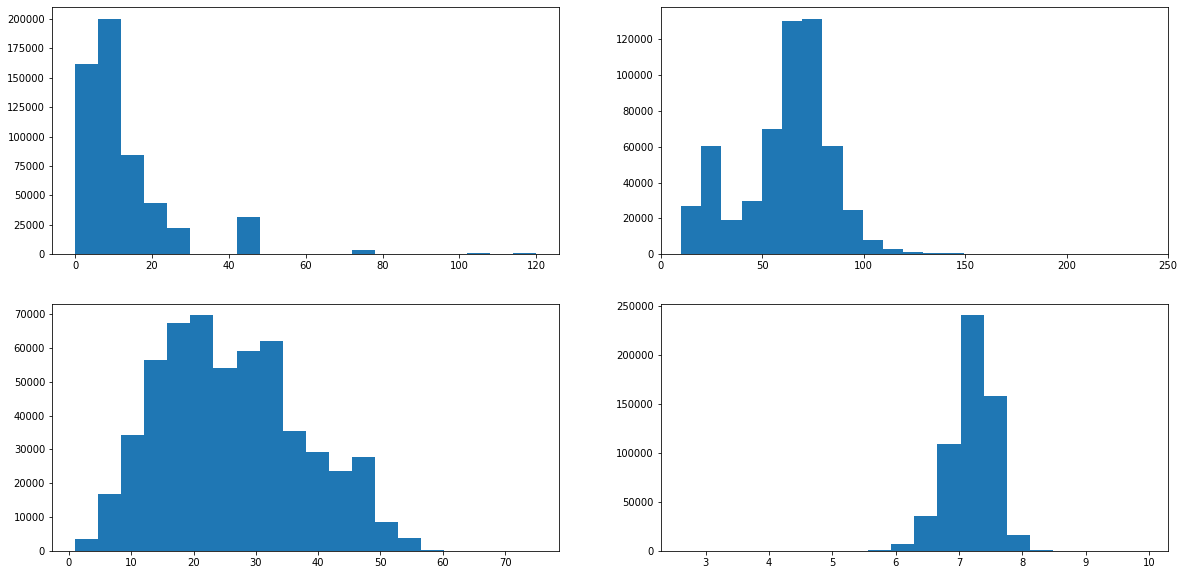

In [92]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
axes[0][0].hist(df['最寄駅：距離（分）'],bins=20)
axes[0][1].hist(df['面積（㎡）'],bins=200)
axes[0][1].set_xlim(0,250)
axes[1][0].hist(df['建築年'],bins=20)
axes[1][1].hist(df['取引価格（総額）_log'],bins=20)
plt.show()

**Lesson** **34**
> 散布図を描画してみよう

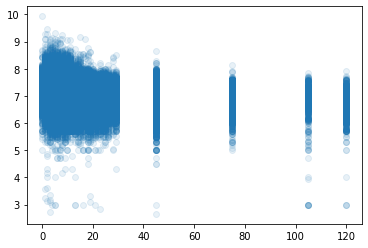

In [95]:
plt.scatter(df['最寄駅：距離（分）'],df['取引価格（総額）_log'], alpha=0.1)